# TA Semantic Function Distribution

In [1]:
from scripts.imports import *
import json

with open(paths['cl_clusters'], 'r') as infile:
    clclusts = json.load(infile)
    
out = Exporter(
    paths['outdir'],
    'semantics'
)

cc10_books = list(clclusts['10']['bookbounds'].keys())
cc10_bbounds = list(clclusts['10']['bookbounds'].values())


In [2]:
def plot_distrib(df, ax=None, title='', **kwargs):
    """Plot distribution plot."""
    kws = {
        's': 4,
        'color': 'indigo',
    }
    kws.update(kwargs)
    if not ax:
        fig, ax = plt.subplots(figsize=(10, 3))
    sns.swarmplot(x=df.cl_clust10, ax=ax, **kws)
    ax.set_xticks(cc10_bbounds)
    ax.set_xticklabels(cc10_books, rotation=60)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.grid(axis='x')
    ax.set_axisbelow(True)

# All Time Distribution

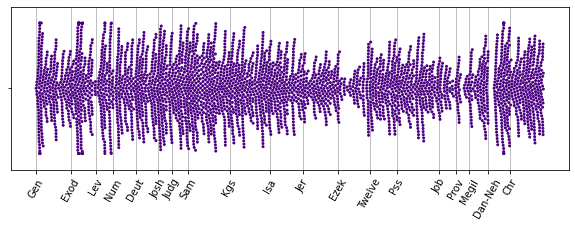

In [3]:
plot_distrib(df, s=3) # all TAs


## All Time Genre

In [25]:
all_genre_ct = df.main_genre.value_counts()
all_genre_pr = all_genre_ct / all_genre_ct.sum()

all_genre_ct

prose-Q        1058
prose-N         944
prophecy        561
poetry          414
instruction     312
Name: main_genre, dtype: int64

In [26]:
all_genre_pr

prose-Q        0.321678
prose-N        0.287017
prophecy       0.170569
poetry         0.125874
instruction    0.094862
Name: main_genre, dtype: float64

In [27]:
out.number(
    all_genre_pr.loc['prose-Q']*100,
    'allg_proseQ_pr',
)

'32'

In [28]:
out.number(
    all_genre_pr.loc['prose-N']*100,
    'allg_proseN_pr',
)

'29'

## Simultaneous

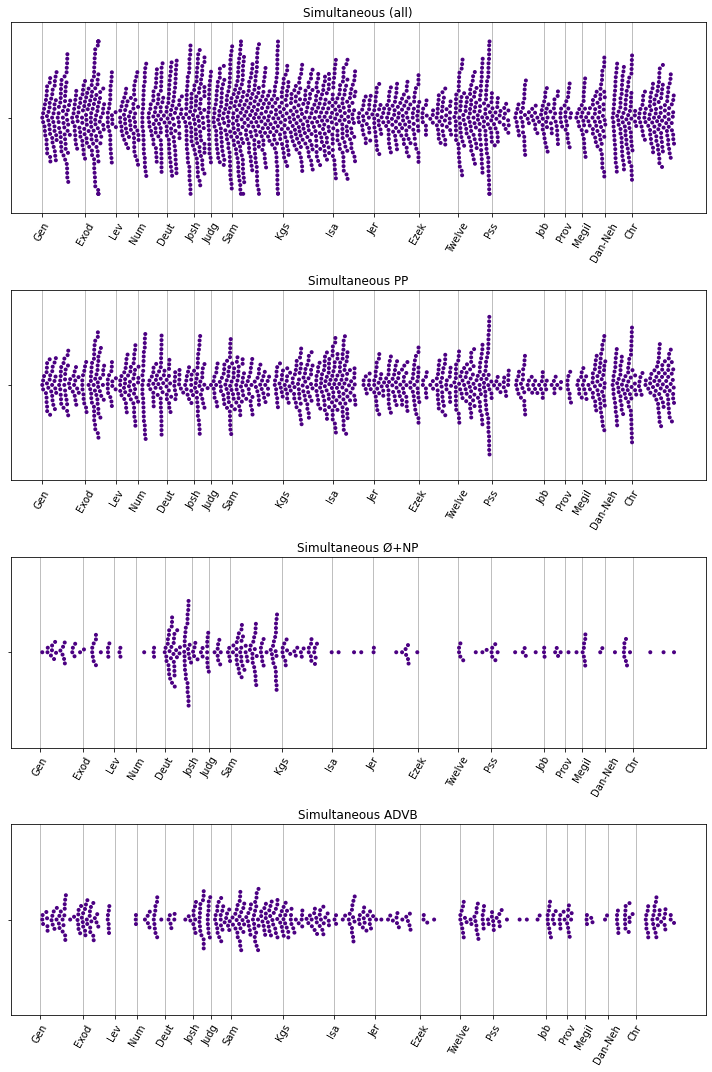

In [4]:
simul_df = df[df.function == 'simultaneous']
simprep = simul_df[
    (simul_df.is_advb == 0)
    & (simul_df.front != 'Ø')
]
simnull = simul_df[
    (simul_df.is_advb == 0)
    & (simul_df.front == 'Ø')
]
simadvb = simul_df[simul_df.is_advb == 1]

fig, axs = plt.subplots(4, 1, figsize=(10, 15))

title2data = {
    'Simultaneous (all)': simul_df,
    'Simultaneous PP': simprep,
    'Simultaneous Ø+NP': simnull,
    'Simultaneous ADVB': simadvb,
}

for title, ax in zip(title2data, axs.ravel()):
    data = title2data[title]
    plot_distrib(data, title=title, ax=ax)
    
fig.tight_layout()

out.plot(
    'distrib_simul',
)


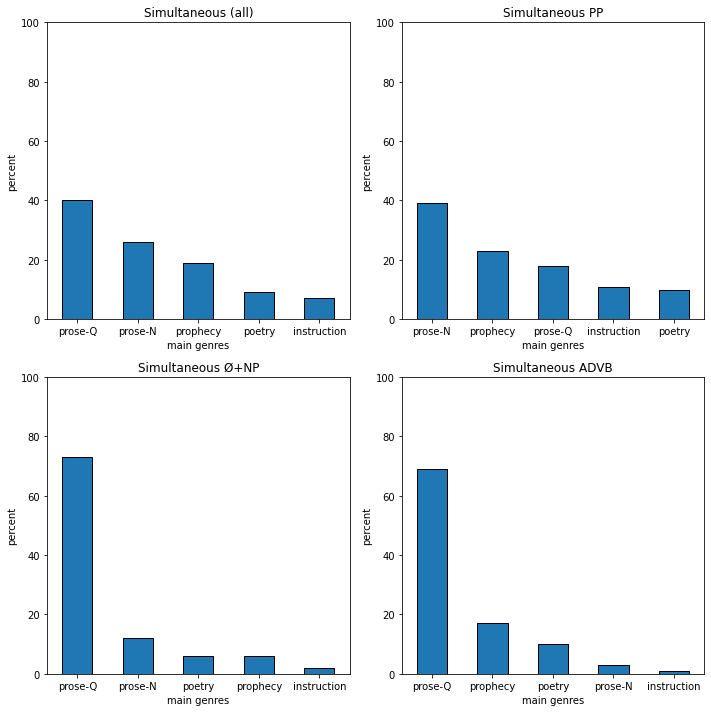

In [55]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs = axs.ravel()

for ax, title in zip(axs, title2data):
    data = title2data[title]
    genre_ct = data.main_genre.value_counts()
    genre_pr = genre_ct / genre_ct.sum()
    genre_pr.mul(100).round().astype(int).plot(kind='bar', ax=ax, edgecolor='black')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_ylabel('percent')
    ax.set_xlabel('main genres')
    ax.set_title(title)
    ax.set_ylim(0, 100)
fig.tight_layout()

out.plot(
    'bar_simgen_prs'
)

### Get Examples

I want to see what these clusters mean...

In [6]:
sp_cts = simprep.cl_clust10.value_counts()

sp_cts

1549    4
5245    4
8062    4
7836    4
1663    4
       ..
695     1
2746    1
4795    1
6846    1
6021    1
Name: cl_clust10, Length: 988, dtype: int64

In [7]:
ts.show(
    simprep[simprep.cl_clust10 == 1549]
)

showing 4 of 4


,verse,clause,verb_utf8
node,,,
443027,Numbers 19:12,ה֣וּא יִתְחַטָּא־בֹ֞ו בַּיֹּ֧ום הַשְּׁלִישִׁ֛י,חטא
443028,Numbers 19:12,וּבַיֹּ֥ום הַשְּׁבִיעִ֖י יִטְהָ֑ר,טהר
443029,Numbers 19:12,וְאִם־לֹ֨א יִתְחַטָּ֜א בַּיֹּ֧ום הַשְּׁלִישִׁ֛י,חטא
443030,Numbers 19:12,וּבַיֹּ֥ום הַשְּׁבִיעִ֖י לֹ֥א יִטְהָֽר׃,טהר


# Subplot Approach

In [8]:
# fig, axs = plt.subplots(4, 2, figsize=(10, 12))
# axs = axs.ravel()

# for ax, funct in zip(axs, funct_cts.index):
#     see_function = 'atelic_ext'
#     sns.swarmplot(x=df[df.function==funct].cl_clust10, ax=ax, s=2.6, palette='magma')
#     ax.set_xticks(list(clclusts['10']['bookbounds'].values()))
#     ax.set_xticklabels(clclusts['10']['bookbounds'].keys(), rotation=90, size=9)
#     ax.set_title(funct)
#     ax.set_xlabel('')
    
# fig.tight_layout()
# #plt.savefig('/Users/cody/Desktop/time_functs.pdf', format='pdf')

# By Function (individually)

# Function by Genre

In [10]:
genre_ct = pivot_ct(
    df[
        (df.mainfunction==1)
        & (df.genre.isin(['prose', 'instruction', 'poetry', 'prophetic']))
        & (df.domain.isin(['Q', 'N']))
    ],
    ['function'],
    ['main_genre']
)

genre_ct

main_genre,prose-Q,prose-N,prophecy,poetry,instruction
function,,,,,
simultaneous,703,456,335,160,122
atelic_ext,106,196,49,80,65
anterior_dur,107,71,67,111,54
posterior,31,106,22,8,22
posterior_dur,12,7,38,3,5
habitual,8,13,10,6,13
anterior,7,3,1,3,0
telic_ext,2,6,3,1,1
dist_fut,4,0,2,0,0


In [11]:
genre_pr = genre_ct.div(genre_ct.sum(1), 0)
genre_pr2 = genre_ct.T.div(genre_ct.T.sum(1), 0)
genre_pr

main_genre,prose-Q,prose-N,prophecy,poetry,instruction
function,,,,,
simultaneous,0.395833,0.256757,0.188626,0.090090,0.068694
atelic_ext,0.213710,0.395161,0.098790,0.161290,0.131048
anterior_dur,0.260976,0.173171,0.163415,0.270732,0.131707
posterior,0.164021,0.560847,0.116402,0.042328,0.116402
posterior_dur,0.184615,0.107692,0.584615,0.046154,0.076923
habitual,0.160000,0.260000,0.200000,0.120000,0.260000
anterior,0.500000,0.214286,0.071429,0.214286,0.000000
telic_ext,0.153846,0.461538,0.230769,0.076923,0.076923
dist_fut,0.666667,0.000000,0.333333,0.000000,0.000000


### ΔP tests for genre

In [18]:
genre_dp = sig.apply_deltaP(genre_ct, 0, 1)
genre_dp2 = sig.apply_deltaP(genre_ct.T, 0, 1)

genre_dp

main_genre,prose-Q,prose-N,prophecy,poetry,instruction
function,,,,,
simultaneous,0.171114,-0.065876,0.034533,-0.080054,-0.059717
atelic_ext,-0.133480,0.133087,-0.090442,0.045693,0.045142
anterior_dur,-0.074400,-0.128131,-0.012696,0.170808,0.044418
posterior,-0.172018,0.295404,-0.061854,-0.086158,0.024627
posterior_dur,-0.143758,-0.180099,0.419245,-0.078635,-0.016753
habitual,-0.168062,-0.024320,0.026043,-0.003149,0.169489
anterior,0.175532,-0.069956,-0.103438,0.091613,-0.093750
telic_ext,-0.172176,0.178388,0.056625,-0.046374,-0.016463
dist_fut,0.342065,-0.284483,0.159262,-0.123342,-0.093501


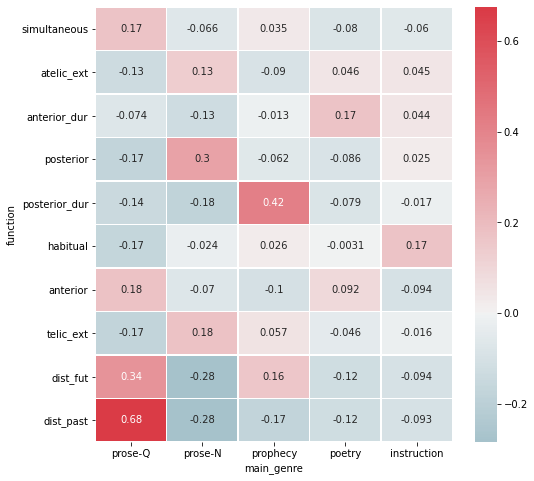

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
heatmap(genre_dp, annot=True, square=False)

## Fishers

In [21]:
genre_fs, genre_odds = sig.apply_fishers(genre_ct, 0, 1)

In [22]:
genre_fs

,prose-Q,prose-N,prophecy,poetry,instruction
simultaneous,22.749722,-4.079710,1.828135,-10.135284,-7.410301
atelic_ext,-8.566858,8.320168,-6.414863,2.247389,2.636964
anterior_dur,-2.578228,-7.446766,-0.239902,18.145225,2.225082
posterior,-6.475378,15.595433,-1.533743,-3.853535,0.608283
posterior_dur,-1.813527,-3.118026,13.199064,-1.251289,-0.081093
habitual,-1.857086,-0.058301,0.239152,0.000000,3.337814
anterior,0.782534,-0.114144,-0.312607,0.396238,-0.198053
telic_ext,-0.612936,0.671113,0.315122,0.000000,0.000000
dist_fut,1.035446,-0.714878,0.549952,0.000000,0.000000
dist_past,1.464118,-0.249483,0.000000,0.000000,0.000000


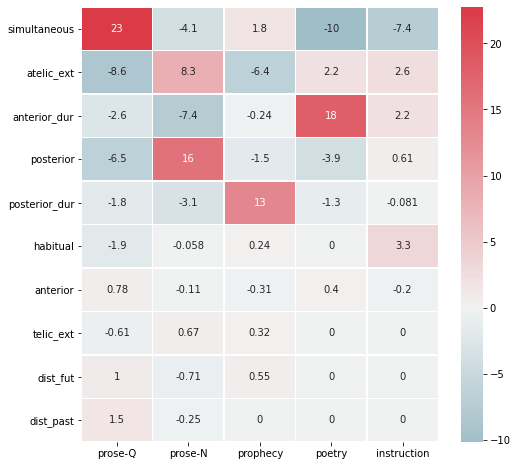

In [23]:
afig, ax = plt.subplots(figsize=(8, 8))
heatmap(genre_fs, annot=True, square=False)